In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

# 폰트 설정 (맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'

In [12]:
# 데이터 로드 (노트북에서는 상대경로 사용)
df = pd.read_csv('../data/hotel_bookings.csv')

In [13]:
# 기본 정보 확인
print("데이터 형태:", df.shape)
print("\n데이터 타입:\n", df.dtypes)
print("\n결측치 개수:\n", df.isnull().sum())

데이터 형태: (119390, 32)

데이터 타입:
 hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
age

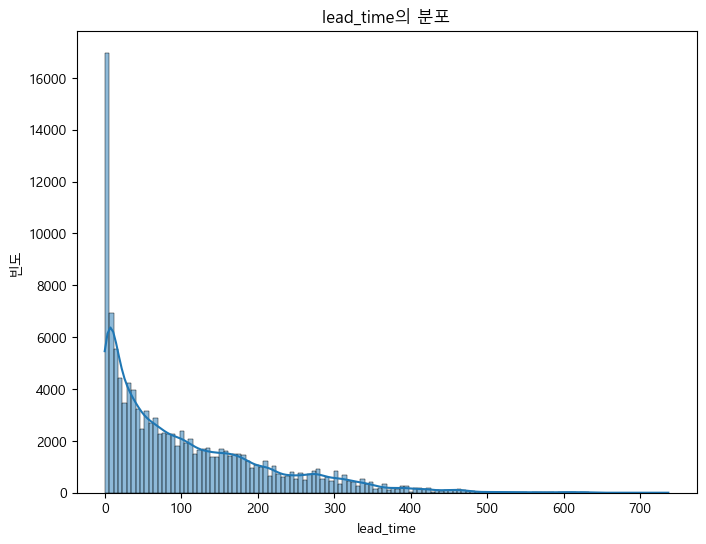

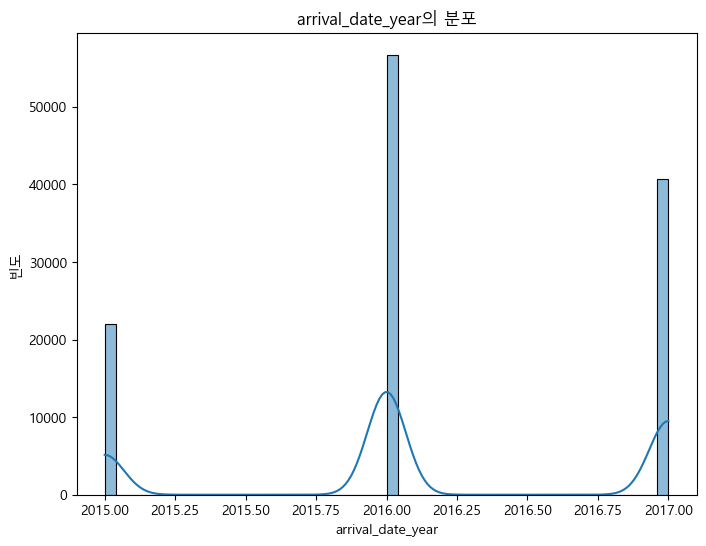

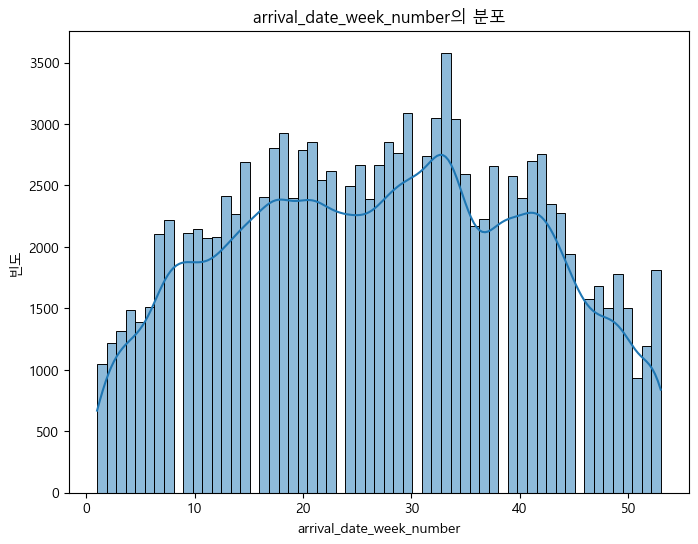

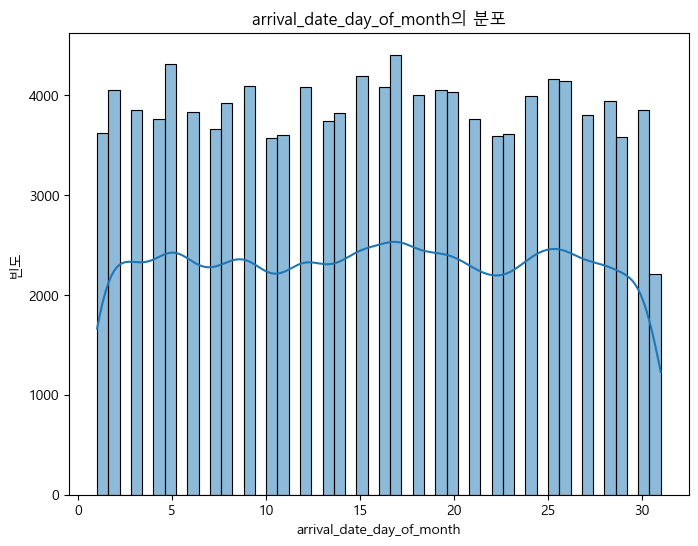

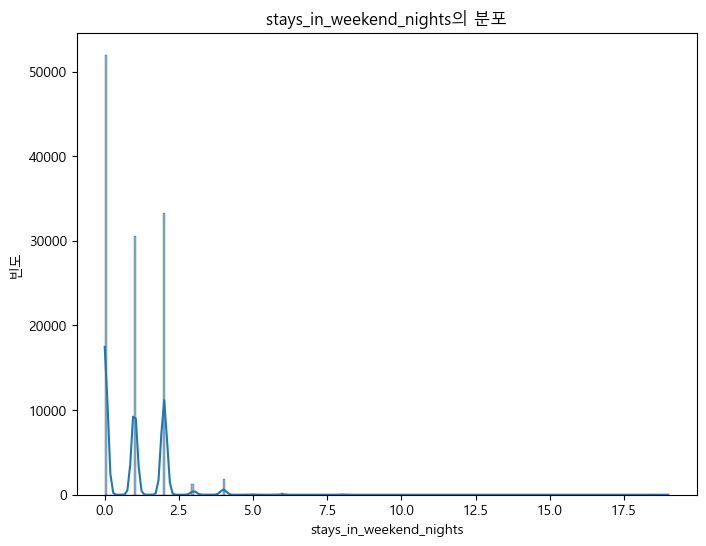

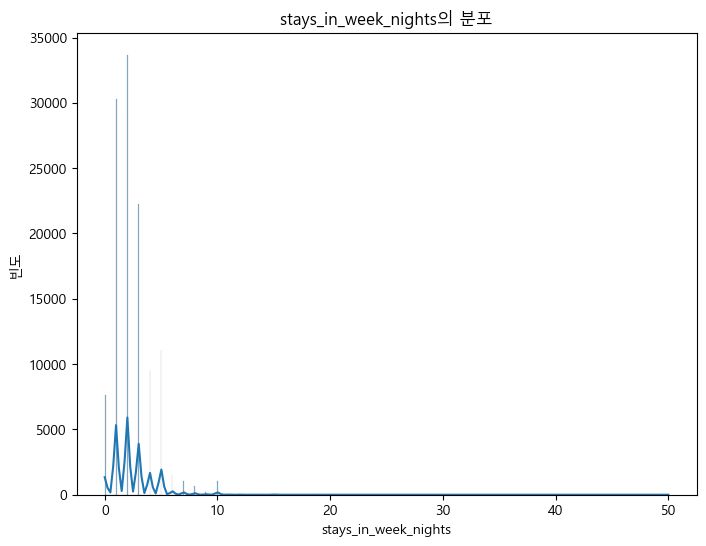

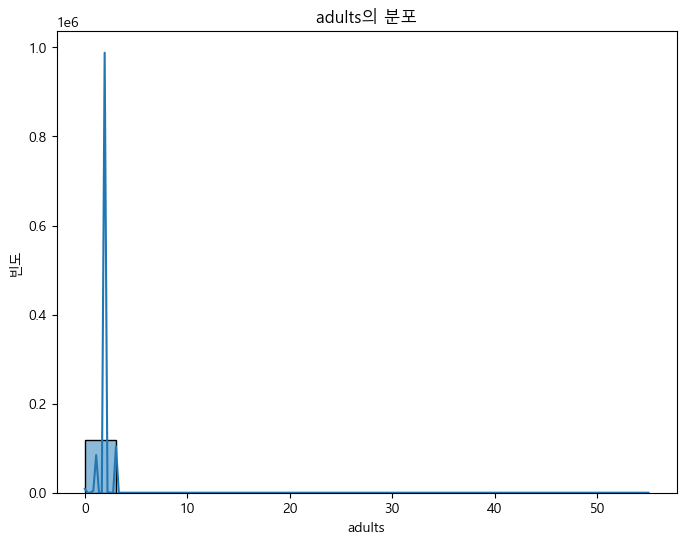

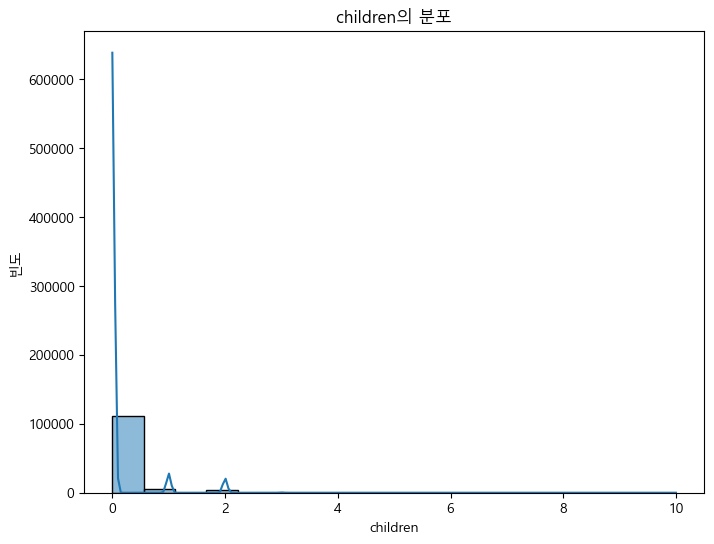

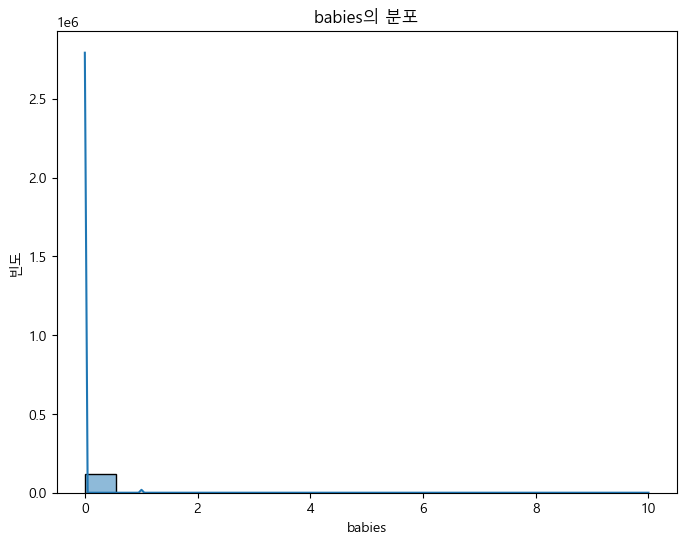

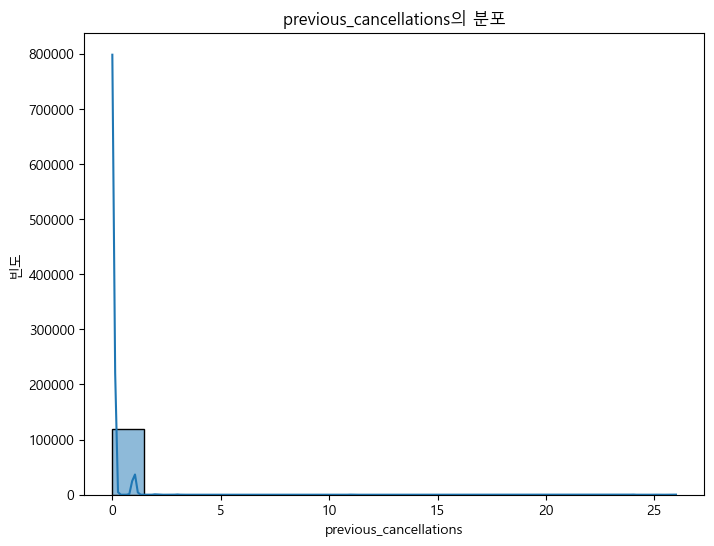

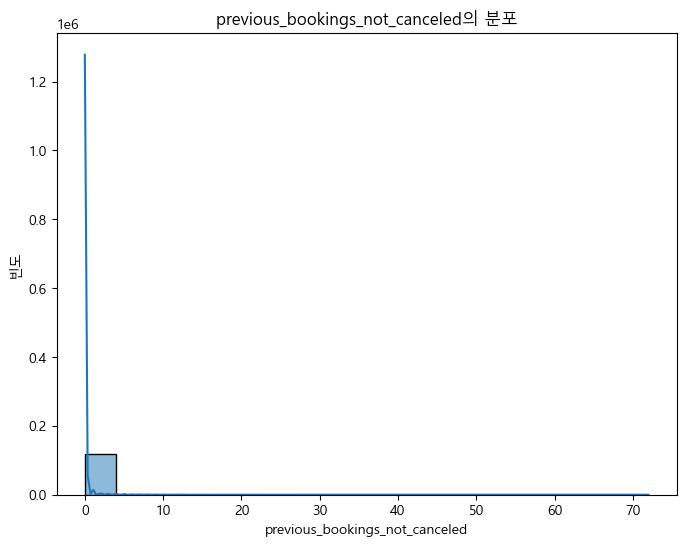

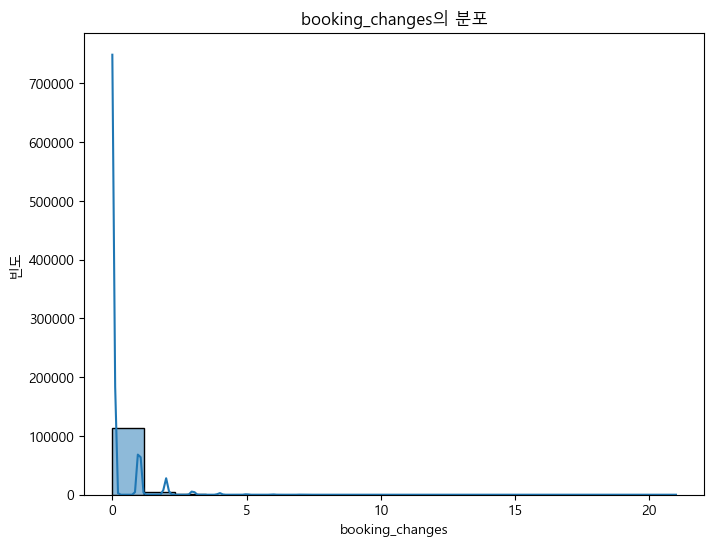

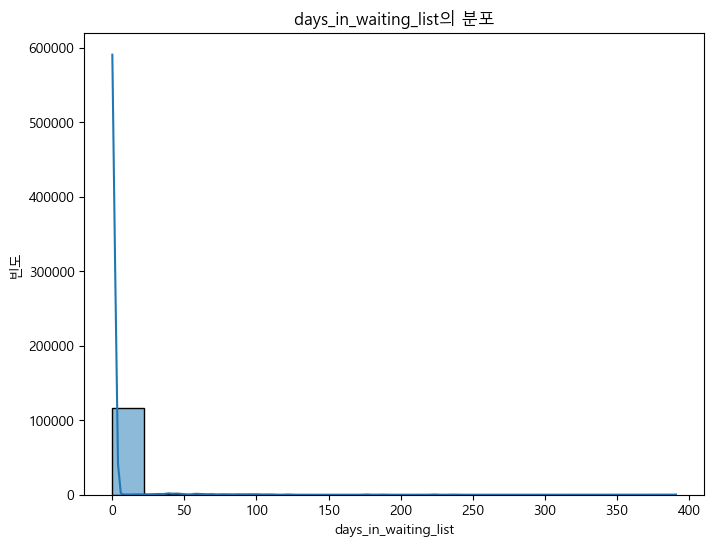

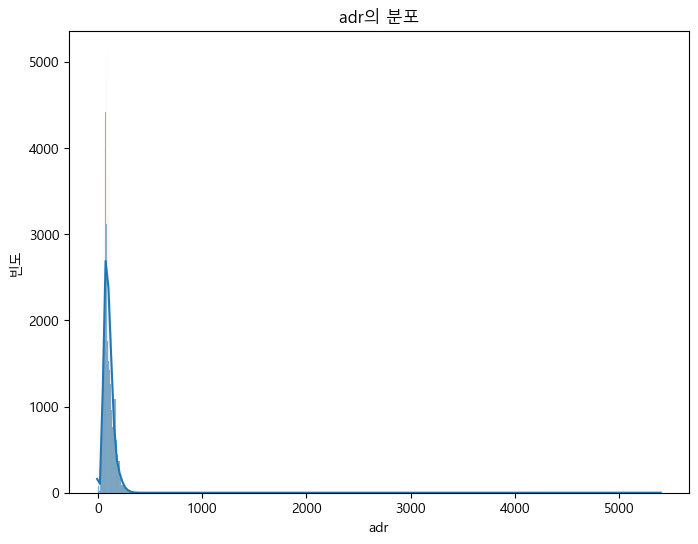

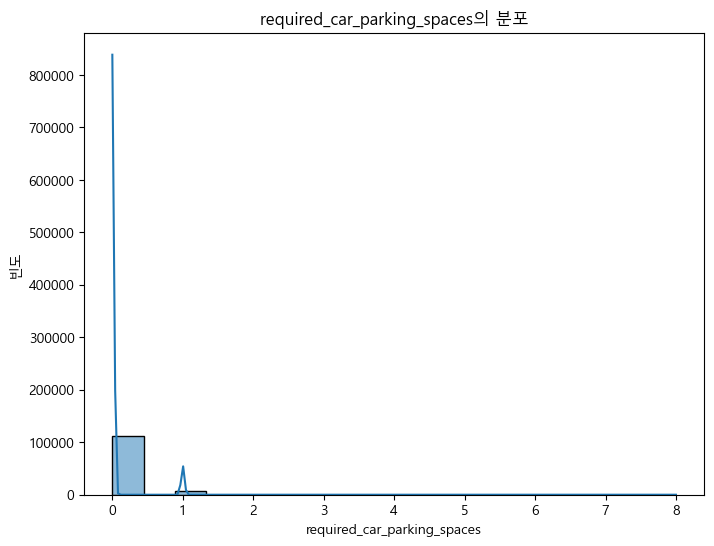

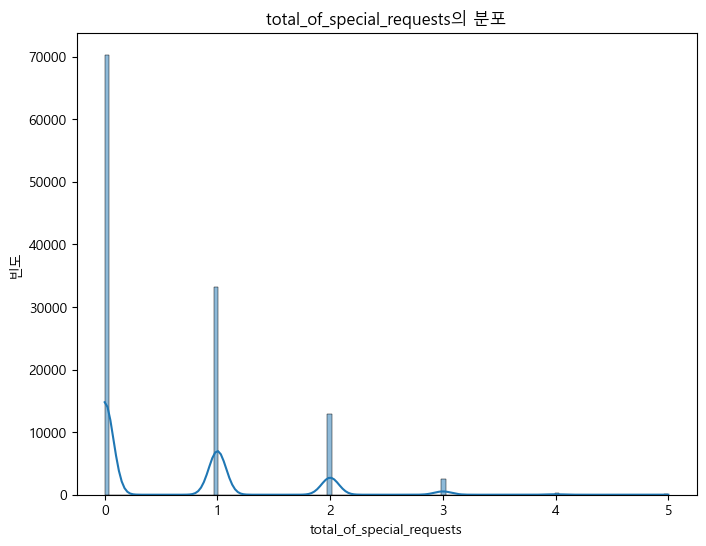

In [14]:
# 수치형 컬럼 리스트
numeric_cols = [
    'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month',
    'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
    'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
    'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests'
]

# 수치형 컬럼 분포 탐색
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'{col}의 분포')
    plt.xlabel(col)
    plt.ylabel('빈도')
    plt.show()

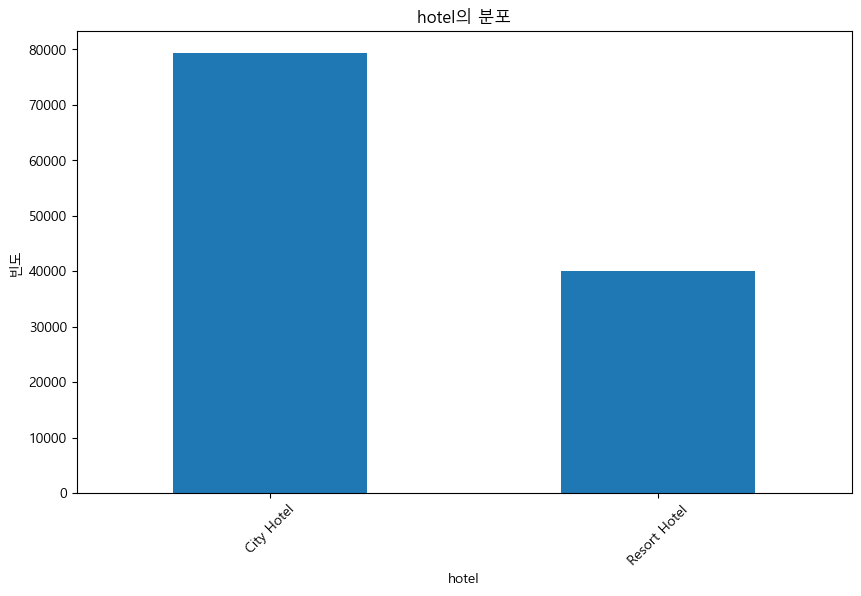

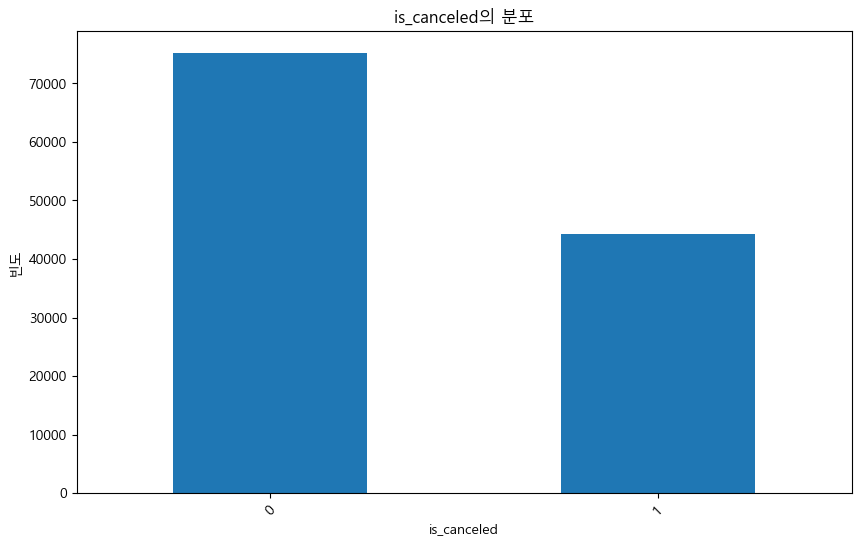

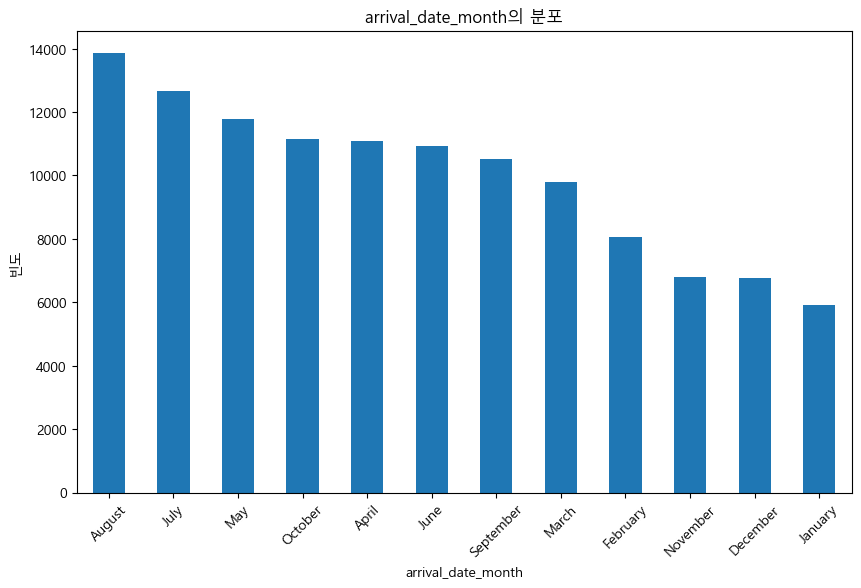

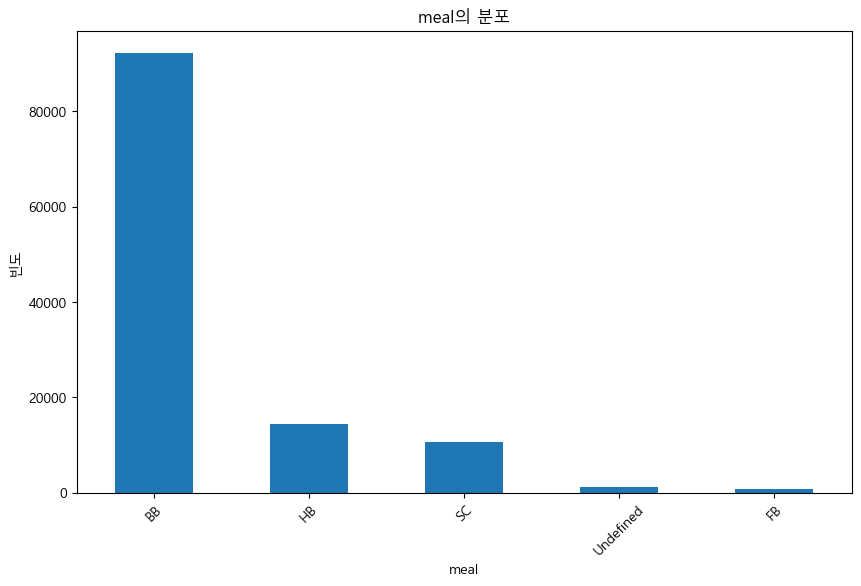

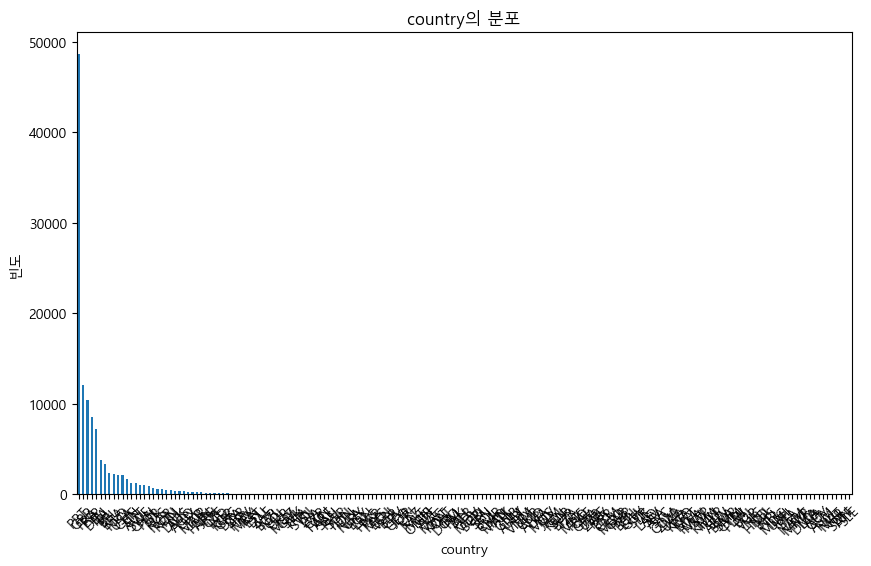

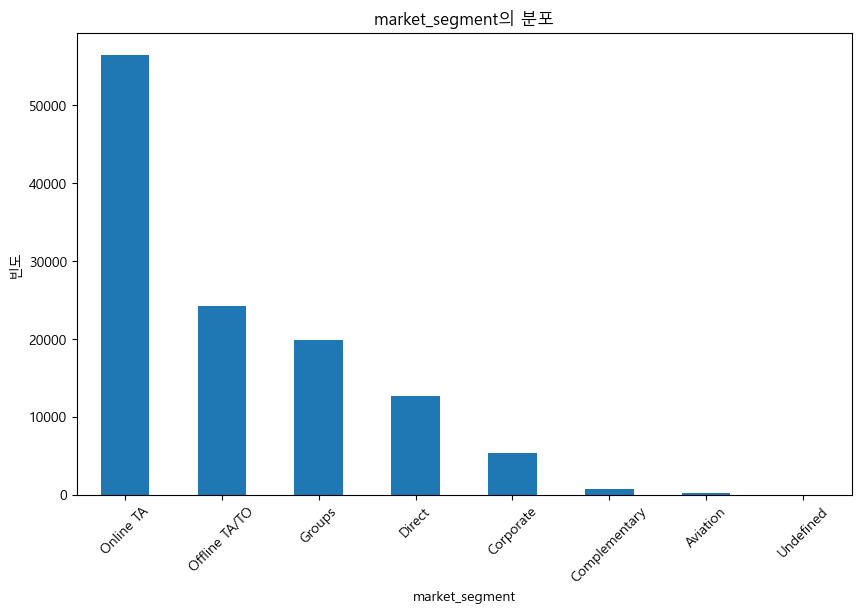

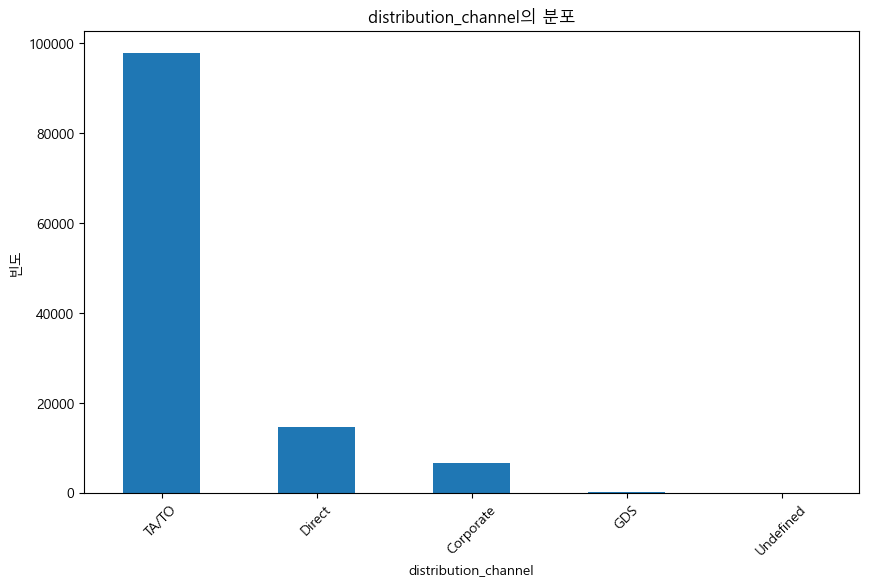

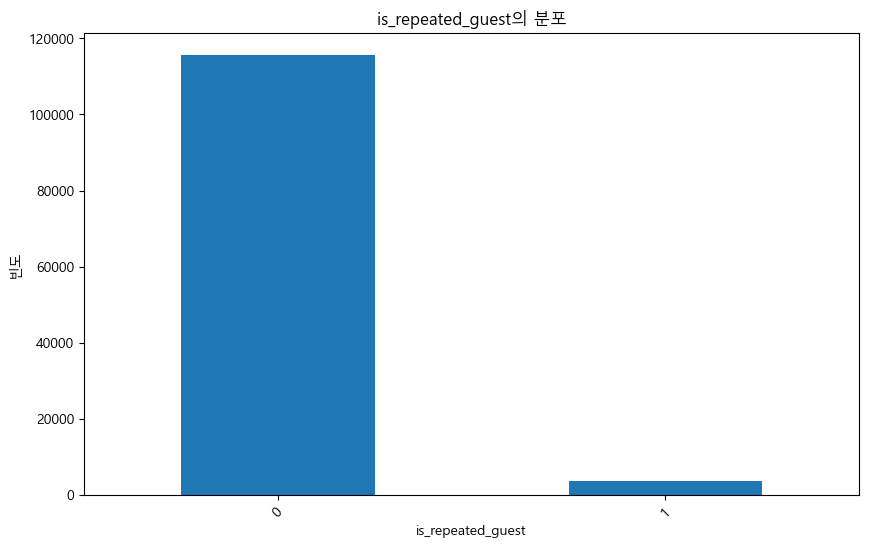

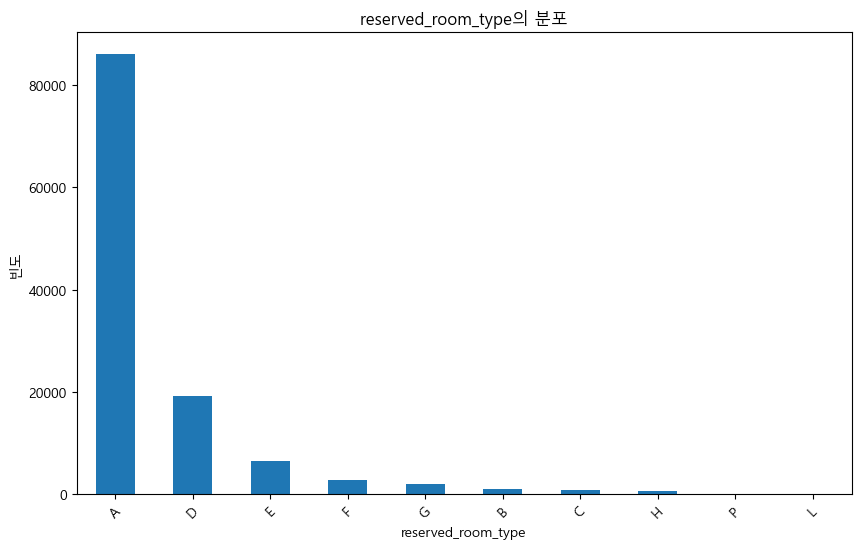

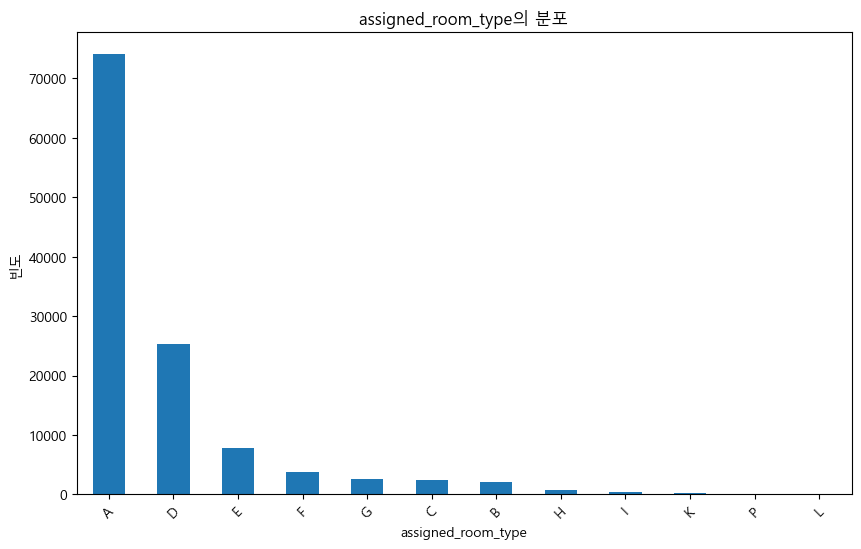

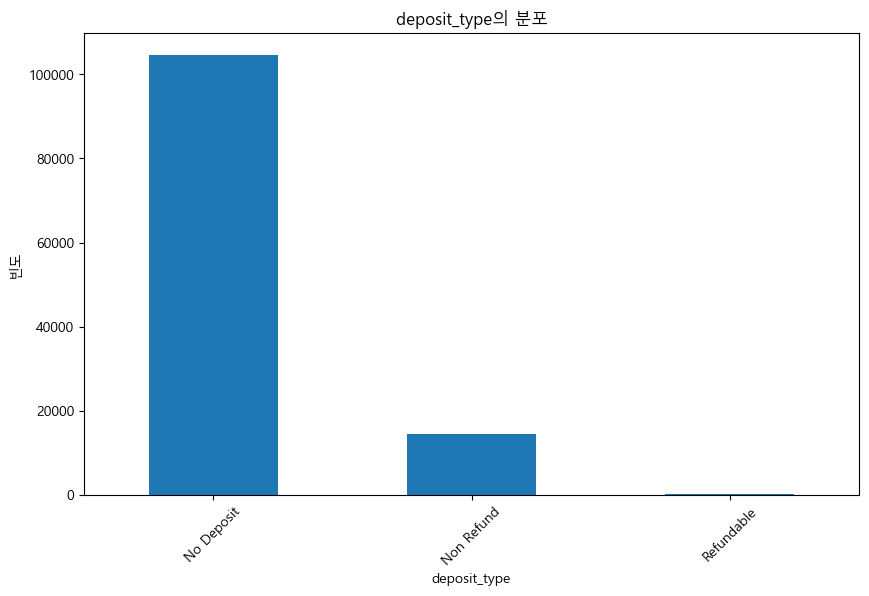

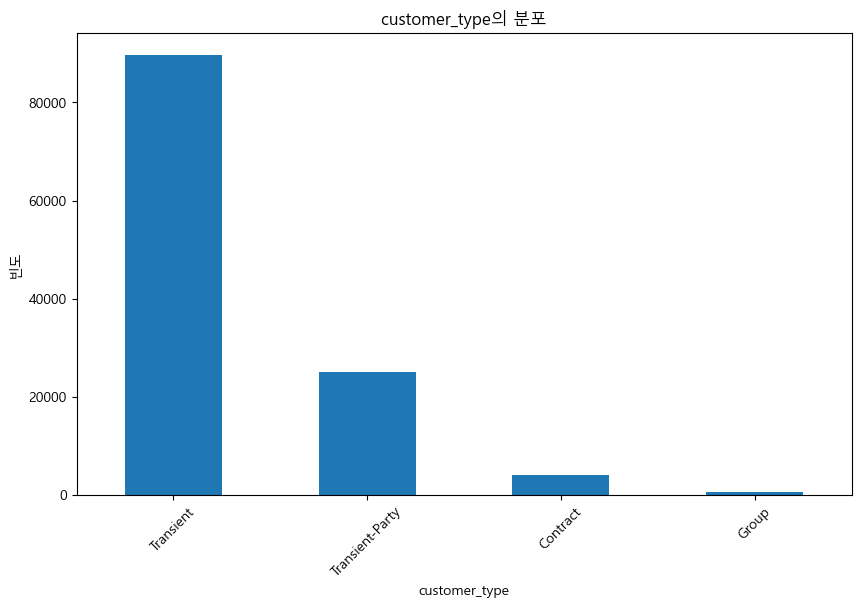

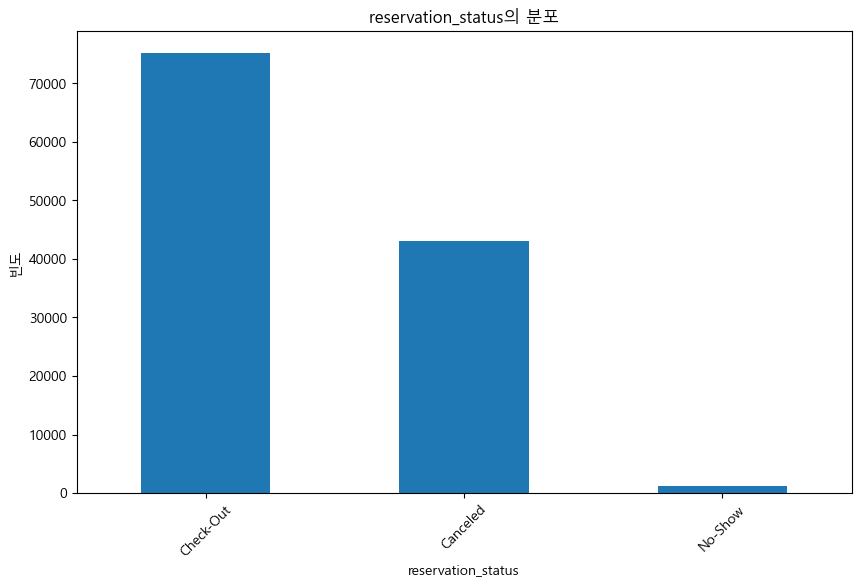

In [15]:
# 범주형 컬럼 리스트
categorical_cols = [
    'hotel', 'is_canceled', 'arrival_date_month', 'meal', 'country', 'market_segment',
    'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
    'deposit_type', 'customer_type', 'reservation_status'
]

# 범주형 컬럼 분포 탐색 (agent와 company는 결측치가 많을 수 있으므로 제외)
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'{col}의 분포')
    plt.xlabel(col)
    plt.ylabel('빈도')
    plt.xticks(rotation=45)
    plt.show()

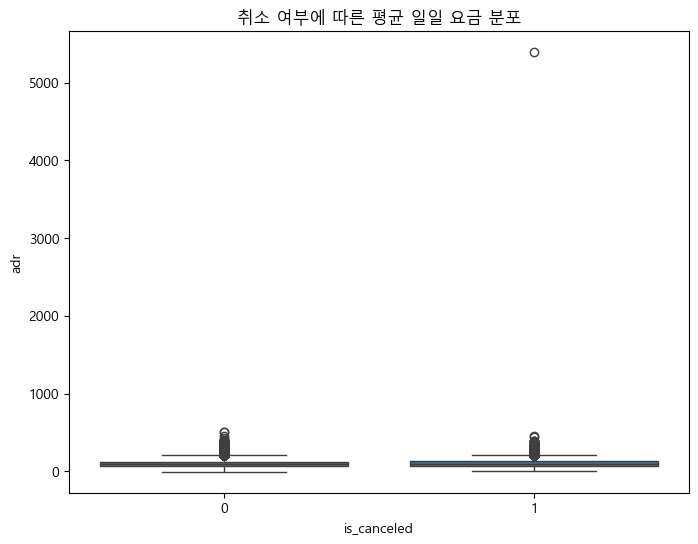

In [16]:
# 추가: is_canceled에 따른 adr 분포 비교
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_canceled', y='adr', data=df)
plt.title('취소 여부에 따른 평균 일일 요금 분포')
plt.show()